In [100]:
import pandas as pd

In [101]:
import os

In [102]:
import matplotlib.pyplot as plt

In [103]:
import seaborn as sns

In [104]:
import numpy as np

In [105]:
jpred = pd.read_csv("jpred4.tsv",sep='\t')

In [106]:
Struc_dict={}
for file in os.listdir("/home/thomas/Documents/Lab2Project/BlastpOnCluster/150dssp"):
    with open("/home/thomas/Documents/Lab2Project/BlastpOnCluster/150dssp/"+file,"r") as fl:
        fl.readline()
        for line in fl:
            line = line.rstrip()
            for base in line:
                Struc_dict[base]=Struc_dict.get(base,0)+1

                
#del Struc_dict["X"]            
print(Struc_dict)


{'C': 9049, 'E': 6032, 'H': 9888}


In [107]:
df = pd.DataFrame([Struc_dict])
df

,C,E,H
0,9049,6032,9888


In [108]:
df1 = pd.melt(df, value_name='count')
df1

,variable,count
0,C,9049
1,E,6032
2,H,9888


/home/thomas/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


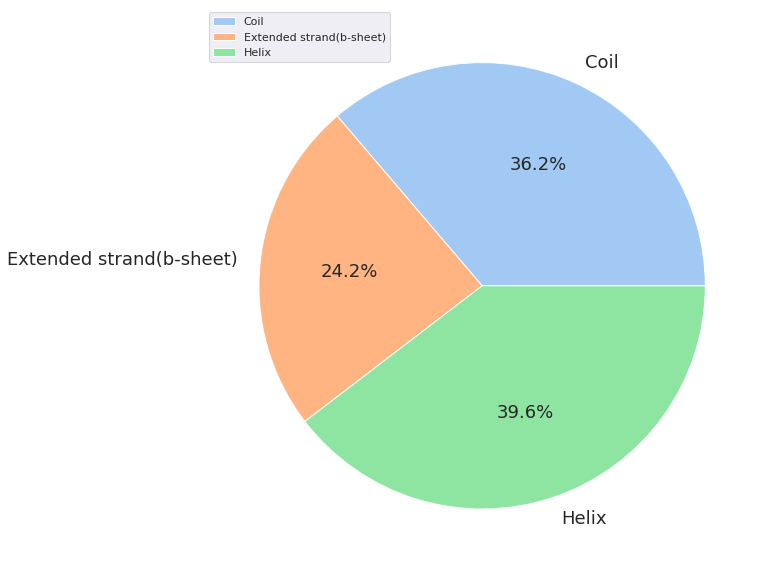

In [109]:
labels = ["Coil","Extended strand(b-sheet)","Helix"]
df1.plot.pie(y="count", autopct='%1.1f%%', labels=labels, textprops={'fontsize': 18}, figsize=(10,20))
plt.axes().set_ylabel('')
plt.legend(loc='upper left')
plt.savefig('BlindPiechart.png')

In [97]:
base_dict={}
for file in os.listdir("/home/thomas/Documents/Lab2Project/BlastpOnCluster/150Fasta"):
    with open("/home/thomas/Documents/Lab2Project/BlastpOnCluster/150Fasta/"+file,"r") as fl:
        fl.readline()
        for line in fl:
            line = line.rstrip()
            for base in line:
                base_dict[base]=base_dict.get(base,0)+1

del base_dict["B"]
del base_dict["X"]            
print(base_dict)

{'A': 1843, 'E': 1827, 'Q': 1005, 'K': 1492, 'L': 2526, 'R': 1303, 'S': 1560, 'C': 262, 'V': 1726, 'T': 1375, 'P': 1112, 'N': 1082, 'D': 1351, 'I': 1520, 'G': 1631, 'W': 315, 'F': 1038, 'H': 592, 'M': 484, 'Y': 862}


<BarContainer object of 20 artists>

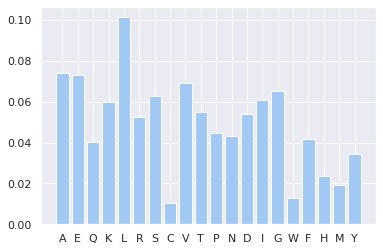

In [98]:
#base_dict = collections.OrderedDict(sorted(base_dict.items()))
keys = base_dict.keys()
values = base_dict.values()
t_sum =sum(base_dict.values())
for i in base_dict.keys():
    base_dict[i]=base_dict[i]/t_sum
sns.set_palette("pastel")
plt.bar(keys, values)

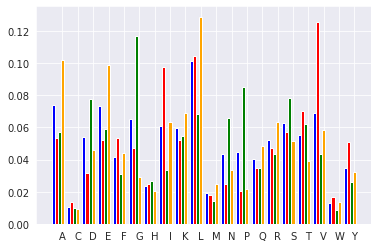

<Figure size 4320x5760 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [91]:
import collections
base_fname=[]
residues_h={} #"H"
residues_c={} #"-"
residues_s={} # "E"


for file in os.listdir("/home/thomas/Documents/Lab2Project/BlastpOnCluster/150Fasta"):
    with open("/home/thomas/Documents/Lab2Project/BlastpOnCluster/150Fasta/"+file,"r") as fasta_file, open("/home/thomas/Documents/Lab2Project/BlastpOnCluster/150dssp/"+file[0:-5]+"txt","r") as dssp_file:
        fasta_lines=fasta_file.readlines()
        dssp_lines=dssp_file.readlines()
        for i in range(len(fasta_lines)):
            if fasta_lines[i][0]==">": continue
            for j in range(len(fasta_lines[i])):
                if dssp_lines[i][j] == "H":
                    residues_h[fasta_lines[i][j]]=residues_h.get(fasta_lines[i][j],0)+1
                elif dssp_lines[i][j] == "C":
                    residues_c[fasta_lines[i][j]]=residues_c.get(fasta_lines[i][j],0)+1
                elif dssp_lines[i][j] == "E":
                    residues_s[fasta_lines[i][j]]=residues_s.get(fasta_lines[i][j],0)+1


h_sum =sum(residues_h.values())
c_sum =sum(residues_c.values())
s_sum =sum(residues_s.values())
for i in residues_h.keys():
    residues_h[i]=residues_h[i]/h_sum
for i in residues_c.keys():
    residues_c[i]=residues_c[i]/c_sum
for i in residues_s.keys():
    residues_s[i]=residues_s[i]/s_sum


del residues_c["B"]
del residues_s["B"]
del residues_c["X"]
del residues_s["X"]
del residues_h["X"]

sbase_dict = collections.OrderedDict(sorted(base_dict.items()))
sresidues_h = collections.OrderedDict(sorted(residues_h.items()))
sresidues_s = collections.OrderedDict(sorted(residues_s.items()))
sresidues_c = collections.OrderedDict(sorted(residues_c.items()))



w = np.arange(len(sbase_dict))
ax = plt.subplot(111)
labels = ["Total", "Coil","Extended strand(b-sheet)","Helix"]
ax.bar(w, sresidues_h.values(), width=0.2, color='orange', align='center', label = "Helix")
ax.bar(w-0.2, sresidues_c.values(), width=0.2, color='g', align='center', label = "Coil")
ax.bar(w-0.4, sresidues_s.values(), width=0.2, color='r', align='center', label = "Strand")
ax.bar(w-0.6, sbase_dict.values(), width=0.2, color='b', align='center', label = "Total")
sns.set_style("darkgrid")
#plt.legend(frameon = False)
#plt.legend(loc='upper right')
plt.xticks(w, sbase_dict.keys())
plt.figure(figsize=(60,80))
plt.show()
plt.savefig('BlindBarchart.png')



TypeError: unsupported operand type(s) for +: 'odict_values' and 'float'

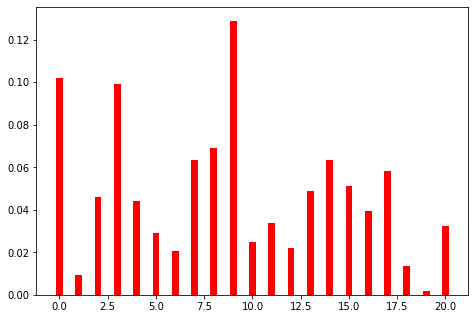

In [50]:

menMeans = sresidues_h.values()
womenMeans = sresidues_c.values()
childMeans = sresidues_s.values()
ind = np.arange(len(sbase_dict))
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.bar(ind, childMeans, width,bottom=menMeans, color='g')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend(labels=['Men', 'Women'])
plt.show()